In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Reshape
from keras.models import Model
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.losses import mean_squared_error, mae
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix , precision_recall_fscore_support


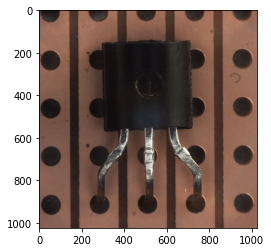

In [21]:
img = image.load_img("C:/transistor/train/good/000.png")
plt.imshow(img)

In [22]:
#loading del training set

transistor_path = "C:/transistor/train/good/"

transistor_train = []
for filename in os.listdir(transistor_path):
     if filename.endswith(".png"):
        img = image.load_img(transistor_path+filename, target_size=(128, 128))
        transistor_train.append(image.img_to_array(img))
transistor_train = np.array(transistor_train)
transistor_train = transistor_train/255
print ("transistor_train", transistor_train.shape)


transistor_train (213, 128, 128, 3)


In [23]:
#loading del test set good
transistor_test_good_path = "C:/transistor/dtest/good/"

transistor_test_good = []

for filename in os.listdir(transistor_test_good_path):
     if filename.endswith(".png"):
        img = image.load_img(transistor_test_good_path+filename, target_size=(128, 128))
        transistor_test_good.append(image.img_to_array(img))
transistor_test_good = np.array(transistor_test_good)

transistor_test_good = transistor_test_good/255

print("transistor_test_good", transistor_test_good.shape)




transistor_test_good (60, 128, 128, 3)


In [24]:
#loading del test set notgood
transistor_test_notgood_path = "C:/transistor/dtest/notgood/"

transistor_test_notgood = []

for filename in os.listdir(transistor_test_notgood_path):
     if filename.endswith(".png"):
        img = image.load_img(transistor_test_notgood_path+filename, target_size=(128, 128))
        transistor_test_notgood.append(image.img_to_array(img))
transistor_test_notgood = np.array(transistor_test_notgood)

transistor_test_notgood = transistor_test_notgood/255

print("transistor_test_notgood", transistor_test_notgood.shape)


transistor_test_notgood (40, 128, 128, 3)


In [25]:

#funzioni per la stampa delle immagini 
def show_transistor_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)
    

In [26]:
#labels

labels0= np.zeros(60, dtype=int)
labels1= np.ones(40, dtype=int)
labels= np.concatenate([labels0, labels1])




In [27]:
#creazione modello

input_layer = Input(shape=(128, 128, 3), name="INPUT")
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name="CODE")(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
output_layer= Conv2D(3, (3, 3), activation='linear', padding='same')(x)

transistor_AE = Model(input_layer, output_layer)
transistor_AE.compile(optimizer='adam', loss='mse')
transistor_AE.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 8)         1160

In [28]:
history = transistor_AE.fit(transistor_train, transistor_train,
                epochs=1000,
                batch_size=16,
                shuffle=True,
                callbacks= EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 30, mode = "min"),
                validation_split=0.15
               )

Epoch 1/1000
12/12 [==============================] - 9s 680ms/step - loss: 0.0997 - val_loss: 0.0593
Epoch 2/1000
12/12 [==============================] - 8s 645ms/step - loss: 0.0385 - val_loss: 0.0312
Epoch 3/1000
12/12 [==============================] - 7s 607ms/step - loss: 0.0270 - val_loss: 0.0238
Epoch 4/1000
12/12 [==============================] - 7s 605ms/step - loss: 0.0225 - val_loss: 0.0209
Epoch 5/1000
12/12 [==============================] - 8s 631ms/step - loss: 0.0203 - val_loss: 0.0188
Epoch 6/1000
12/12 [==============================] - 8s 624ms/step - loss: 0.0186 - val_loss: 0.0176
Epoch 7/1000
12/12 [==============================] - 7s 612ms/step - loss: 0.0174 - val_loss: 0.0163
Epoch 8/1000
12/12 [==============================] - 8s 634ms/step - loss: 0.0161 - val_loss: 0.0151
Epoch 9/1000
12/12 [==============================] - 8s 657ms/step - loss: 0.0149 - val_loss: 0.0141
Epoch 10/1000
12/12 [==============================] - 8s 642ms/step - loss: 0.013

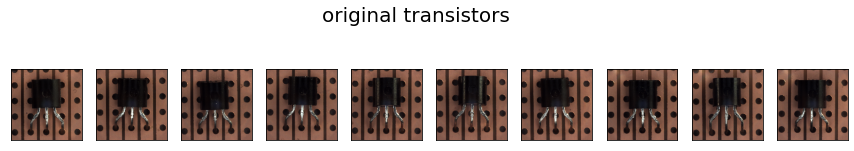

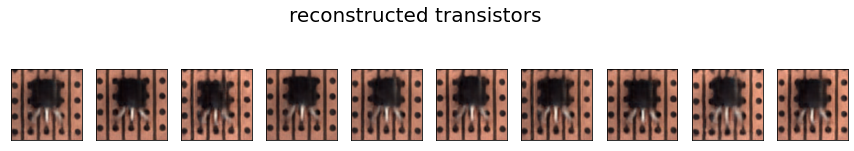

In [29]:
#stampa dei risultati

transistor_AE.save("transistor_AE.h5")


reconstructed_transistor = transistor_AE.predict(transistor_train)
show_transistor_data(transistor_train, title="original transistors")
show_transistor_data(reconstructed_transistor, title="reconstructed transistors")

In [30]:
#calcolo soglia

reconstructed_transistor = transistor_AE.predict(transistor_train)

train_loss = mean_squared_error(transistor_train, reconstructed_transistor)

threshold =  np.mean(train_loss) + np.median(train_loss)
print("Threshold: ",threshold)

reconstructions = transistor_AE.predict(transistor_test_good)
test_loss_good = mean_squared_error(transistor_test_good,reconstructions)
labels_predict0 =[]

#anomaly detection sulle normali
for i in range(len(test_loss_good)):
    tmp = np.mean(test_loss_good[i])
    if tmp >= threshold:
        print(i+1,"Anomaly")
        labels_predict0.append([1])
    else:
        print(i+1,"Normal")
        labels_predict0.append([0])
        


reconstructions = transistor_AE.predict(transistor_test_notgood)
test_loss_notgood = mean_squared_error(transistor_test_notgood,reconstructions)
labels_predict1 =[]

#anomaly detection sulle anomali
for i in range(len(test_loss_notgood)):
    tmp = np.mean(test_loss_notgood[i])
    if tmp >= threshold:
        print(i+1,"Anomaly")
        labels_predict1.append([1])
    else:
        print(i+1,"Normal")
        labels_predict1.append([0])
        

      
labels_predict= np.concatenate([labels_predict0, labels_predict1])      

#Anomalie 1, Normali 0



Threshold:  0.0038157622
1 Normal
2 Anomaly
3 Anomaly
4 Normal
5 Normal
6 Normal
7 Normal
8 Normal
9 Normal
10 Normal
11 Normal
12 Normal
13 Normal
14 Normal
15 Normal
16 Normal
17 Normal
18 Normal
19 Normal
20 Normal
21 Anomaly
22 Normal
23 Normal
24 Normal
25 Normal
26 Normal
27 Normal
28 Normal
29 Anomaly
30 Anomaly
31 Normal
32 Normal
33 Normal
34 Normal
35 Normal
36 Normal
37 Normal
38 Anomaly
39 Normal
40 Normal
41 Normal
42 Normal
43 Normal
44 Normal
45 Anomaly
46 Anomaly
47 Normal
48 Normal
49 Normal
50 Normal
51 Normal
52 Normal
53 Normal
54 Anomaly
55 Anomaly
56 Normal
57 Normal
58 Normal
59 Normal
60 Anomaly
1 Normal
2 Anomaly
3 Anomaly
4 Normal
5 Normal
6 Normal
7 Normal
8 Anomaly
9 Anomaly
10 Anomaly
11 Anomaly
12 Anomaly
13 Anomaly
14 Anomaly
15 Anomaly
16 Anomaly
17 Anomaly
18 Anomaly
19 Anomaly
20 Anomaly
21 Normal
22 Normal
23 Normal
24 Anomaly
25 Anomaly
26 Normal
27 Anomaly
28 Normal
29 Anomaly
30 Normal
31 Normal
32 Anomaly
33 Normal
34 Normal
35 Anomaly
36 Anomaly


In [31]:
conf_mx = confusion_matrix(labels, labels_predict)
conf_mx

array([[49, 11],
       [16, 24]], dtype=int64)

In [32]:
precision_recall_fscore_support(labels, labels_predict, average='binary')

(0.6857142857142857, 0.6, 0.64, None)

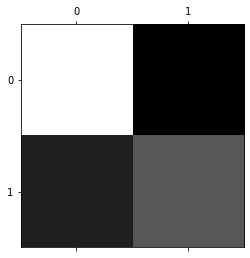

In [33]:
plt.matshow(conf_mx , cmap=plt.cm.gray)
plt.show()


In [34]:
np.mean(train_loss)



0.0032142848

In [35]:
np.mean(test_loss_good)

0.0033998876

In [36]:
np.mean(test_loss_notgood)

0.0052148905

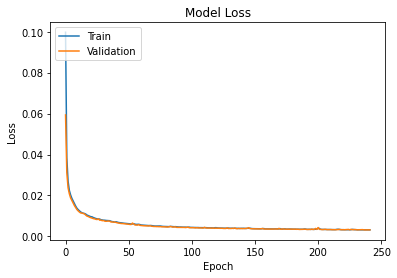

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
